<a href="https://colab.research.google.com/github/bodabhavani/phishing-websites/blob/master/DPDL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from string import printable
from keras.preprocessing import sequence
from sklearn import model_selection
from keras import regularizers
from keras.layers import Input, LSTM, Embedding, Conv1D, MaxPooling1D, ELU, concatenate, BatchNormalization
from keras.layers.core import Dropout,Dense, Lambda
from keras.models import Model
from keras.optimizers import Adam
from keras import backend as K

Using TensorFlow backend.


In [ ]:
df = pd.read_csv("/content/drive/My Drive/url_data.csv")

In [ ]:
df.head(5)

,url,isMalicious
0,imaging-resource.com/PRODS/olympus-e-m1-ii/oly...,0
1,gosugamers.net/lol/streams,0
2,thingiverse.com/corkyzett/collections/intlwome...,0
3,bausch.com/our-products/contact-lens-care/spec...,0
4,w88mobile.org/game/5151.html,0


In [ ]:
url_int_tokens = [[printable.index(x) + 1 for x in url if x in printable] for url in df.url]



In [ ]:
type(url_int_tokens)

list

In [ ]:
url_int_tokens[0]

[19,
 23,
 11,
 17,
 19,
 24,
 17,
 75,
 28,
 15,
 29,
 25,
 31,
 28,
 13,
 15,
 76,
 13,
 25,
 23,
 77,
 52,
 54,
 51,
 40,
 55,
 77,
 25,
 22,
 35,
 23,
 26,
 31,
 29,
 75,
 15,
 75,
 23,
 2,
 75,
 19,
 19,
 77,
 25,
 22,
 35,
 23,
 26,
 31,
 29,
 75,
 15,
 75,
 23,
 2,
 75,
 19,
 19,
 37,
 76,
 44,
 56,
 49]

In [ ]:
max_len=200

In [ ]:


X = sequence.pad_sequences(url_int_tokens, maxlen=max_len)

In [ ]:
type(X)
X.shape


(194797, 200)

In [ ]:
X[0:5]

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0, 19, 23, 11, 17, 19, 24, 17,
        75, 28, 15, 29, 25, 31, 28, 13, 15, 76, 13, 25, 23, 77, 52, 54,
        51, 40, 55, 77, 25, 22, 35, 23, 26, 31, 29, 75, 15, 75, 23,  2,
        75, 19, 19, 77, 25, 22, 35, 23, 26, 31, 29, 75, 15, 75, 23,  2,
        75, 19, 19, 37, 76, 44, 56, 49],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,

In [ ]:

target = np.array(df.isMalicious)


In [ ]:
type(target)

numpy.ndarray

In [ ]:

print('Matrix dimensions of X: ', X.shape, 'Vector dimension of target: ', target.shape)

Matrix dimensions of X:  (194797, 200) Vector dimension of target:  (194797,)


In [ ]:
X_train, X_test, target_train, target_test = model_selection.train_test_split(X, target, test_size=0.25)

In [ ]:
  X_train[0]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 29, 15, 24,
       14, 25, 31, 30, 13, 11, 28, 14, 29, 76, 13, 25, 23, 77, 20, 25, 19,
       24, 77, 14, 19, 29, 30, 28, 19, 12, 31, 30, 25, 28], dtype=int32)

In [ ]:
def lstm_model():
    input_layer = Input(shape=(max_len,), dtype='int32', name='main_input')
    emb = Embedding(input_dim=100, output_dim=512, input_length=max_len)(input_layer) 
    lstm = LSTM(32)(emb)
    lstm = Dropout(0.5)(lstm)
    output = Dense(1, activation='sigmoid', name='output')(lstm)
    model_lstm = Model(input=[input_layer], output=[output])
    adam = Adam(lr=1e-4, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
    model_lstm.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
    return model_lstm

In [ ]:
epochs = 10
batch_size = 1000
model1 = lstm_model()
history = model1.fit(X_train,target_train,validation_split=0.33,epochs = epochs,batch_size = batch_size)
loss, acc1 = model1.evaluate(X_test,target_test,verbose = 1)
print(history.history.keys())


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`
  import sys
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 97884 samples, validate on 48213 samples
Epoch 1/10
97884/97884 [==============================] - 61s 624us/step - loss: 0.6586 - accuracy: 0.6882 - val_loss: 0.5994 - val_accuracy: 0.7274
Epoch 2/10
97884/97884 [==============================] - 57s 587us/step - loss: 0.5370 - accuracy: 0.7446 - val_loss: 0.4880 - val_accuracy: 0.7685
Epoch 3/10
97884/97884 [==============================] - 57s 584us/step - loss: 0.4640 - accuracy: 0.7852 - val_loss: 0.4199 - val_accuracy: 0.8082
Epoch 4/10
97884/97884 [==============================] - 57s 586us/step - loss: 0.4156 - accuracy: 0.8164 - val_loss: 0.3937 - val_accuracy: 0.8257
Epoch 5/10
97884/97884 [==============================] - 58s 596us/step - loss: 0.3981 - accuracy: 0.8265 - val_loss: 0.3823 - val_accuracy: 0.8320
Epoch 6/10
97884/97884 [==============================] - 58s 590us/step - loss: 0.3868 - accuracy: 0.8338 - val_loss: 0.3722 - val_accuracy: 0.8372
Epoch 7/10
97884/97884 [==============================] 

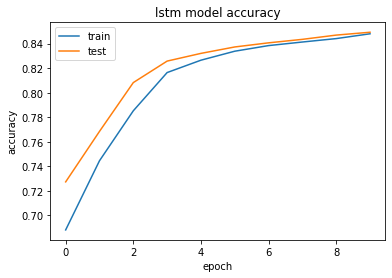

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('lstm model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


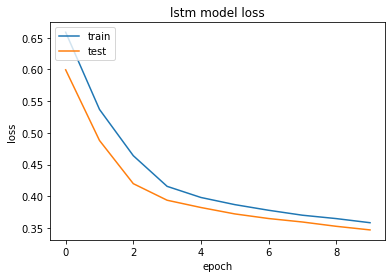

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('lstm model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model1.summary()
print('\nFinal Accuracy', acc1, '\n')


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
main_input (InputLayer)      (None, 200)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 200, 512)          51200     
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                69760     
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
output (Dense)               (None, 1)                 33        
Total params: 120,993
Trainable params: 120,993
Non-trainable params: 0
_________________________________________________________________

Final Accuracy 0.850862443447113 



In [ ]:
def conv_lstm():
  input_layer = Input(shape = (max_len,),dtype = 'int32', name = 'input')
  emb = Embedding(input_dim = 100,output_dim = 512, input_length = 200)(input_layer)
  emb = Dropout(0.25)(emb)
  conv = Conv1D(kernel_size = 5,filters = 256,border_mode = 'same')(emb)
  conv = ELU()(conv)
  conv = MaxPooling1D(pool_size = 4)(conv)
  conv = Dropout(0.5)(conv)
  lstm = LSTM(64, activation = "tanh")(conv)
  lstm = Dropout(0.5)(lstm)
  output = Dense(1,activation = 'sigmoid',name= 'output')(lstm)
  model =Model(input = [input_layer],output = [output])
  adam = Adam(lr = 1e-4, beta_1 = 0.9, beta_2 = 0.999,epsilon = 1e-08,decay = 0.0)
  model.compile(optimizer = adam, loss = 'binary_crossentropy', metrics = ['accuracy'])
  return model

In [ ]:
epochs = 20
batch_size = 1000
model2 = conv_lstm()
history = model2.fit(X_train, target_train,validation_split=0.33,epochs = epochs,batch_size = batch_size)
loass, acc2 = model2.evaluate(X_test,target_test,verbose = 1)
print('\nFinal Cross-Validation Accuracy', acc2, '\n')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(kernel_size=5, filters=256, padding="same")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 97884 samples, validate on 48213 samples
Epoch 1/20
97884/97884 [==============================] - 66s 671us/step - loss: 0.5901 - accuracy: 0.6966 - val_loss: 0.4667 - val_accuracy: 0.7767
Epoch 2/20
97884/97884 [==============================] - 58s 595us/step - loss: 0.4288 - accuracy: 0.8017 - val_loss: 0.3716 - val_accuracy: 0.8382
Epoch 3/20
97884/97884 [==============================] - 58s 592us/step - loss: 0.3536 - accuracy: 0.8496 - val_loss: 0.3079 - val_accuracy: 0.8736
Epoch 4/20
97884/97884 [==============================] - 58s 594us/step - loss: 0.3104 - accuracy: 0.8723 - val_loss: 0.2733 - val_accuracy: 0.8910
Epoch 5/20
97884/97884 [==============================] - 58s 595us/step - loss: 0.2866 - accuracy: 0.8828 - val_loss: 0.2547 - val_accuracy: 0.8992
Epoch 6/20
97884/97884 [==============================] - 58s 595us/step - loss: 0.2694 - accuracy: 0.8901 - val_loss: 0.2415 - val_accuracy: 0.9037
Epoch 7/20
97884/97884 [==============================] 

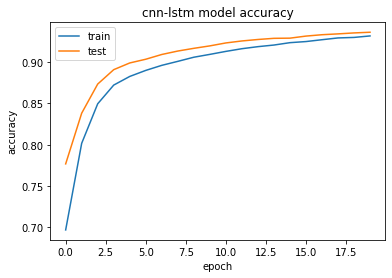

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('cnn-lstm model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

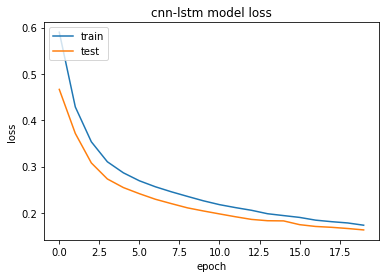

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('cnn-lstm model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model2.summary()
print('\nFinal Accuracy', acc2, '\n')

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 200)               0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 200, 512)          51200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 200, 512)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 200, 256)          655616    
_________________________________________________________________
elu_1 (ELU)                  (None, 200, 256)          0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 50, 256)           0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 50, 256)           0   

In [ ]:
def conv_model():
    # Input
    input_layer = Input(shape=(max_len,), dtype='int32', name='main_input')
    emb = Embedding(input_dim=100, output_dim=512, input_length=max_len,
                W_regularizer=regularizers.l2(1e-4))(input_layer) 
    emb = Dropout(0.25)(emb)
    def sum_1d(X):
        return K.sum(X, axis=1)
    conv = Conv1D(kernel_size = 4, filters = 256)(emb)
    conv = Lambda(sum_1d, output_shape=(256,))(conv)
    conv = Dropout(0.5)(conv)
    
    hidden = Dense(1024)(conv)
    hidden = ELU()(hidden)
    hidden = BatchNormalization(mode=0)(hidden)
    hidden = Dropout(0.5)(hidden)
    output = Dense(1, activation='sigmoid', name='output')(hidden)
    
    model_conv = Model(input=[input_layer], output=[output])
    adam = Adam(lr=1e-4, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
    model_conv.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
    return model_conv

    
    
    
    

    


In [ ]:
epochs = 10
batch_size = 1000

model3 = conv_model()
history = model3.fit(X_train, target_train,validation_split=0.33, epochs=epochs, batch_size=batch_size)
loss, acc3 = model3.evaluate(X_test, target_test, verbose=1)
print(history.history.keys())

model3.summary()
print('\nFinal Cross-Validation Accuracy', acc3, '\n')


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Embedding` call to the Keras 2 API: `Embedding(input_dim=100, output_dim=512, input_length=200, embeddings_regularizer=<keras.reg...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `BatchNormalization` call to the Keras 2 API: `BatchNormalization()`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 97884 samples, validate on 48213 samples
Epoch 1/10
97884/97884 [==============================] - 42s 425us/step - loss: 0.8743 - accuracy: 0.5483 - val_loss: 0.6365 - val_accuracy: 0.5917
Epoch 2/10
97884/97884 [==============================] - 39s 395us/step - loss: 0.7052 - accuracy: 0.6515 - val_loss: 0.5396 - val_accuracy: 0.7110
Epoch 3/10
97884/97884 [==============================] - 39s 395us/step - loss: 0.6486 - accuracy: 0.6795 - val_loss: 0.6422 - val_accuracy: 0.6535
Epoch 4/10
97884/97884 [==============================] - 39s 395us/step - loss: 0.6163 - accuracy: 0.6935 - val_loss: 0.5422 - val_accuracy: 0.7089
Epoch 5/10
97884/97884 [==============================] - 39s 395us/step - loss: 0.5889 - accuracy: 0.7081 - val_loss: 0.5132 - val_accuracy: 0.7356
Epoch 6/10
97884/97884 [==============================] - 39s 395us/step - loss: 0.5689 - accuracy: 0.7155 - val_loss: 0.5009 - val_accuracy: 0.7489
Epoch 7/10
97884/97884 [==============================] 

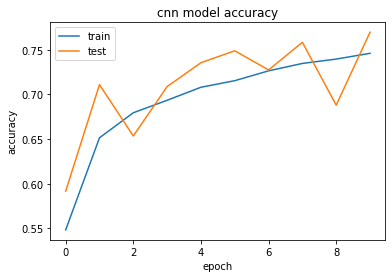

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('cnn model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

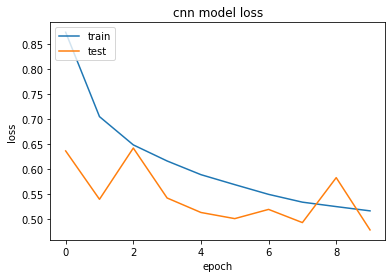

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('cnn model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

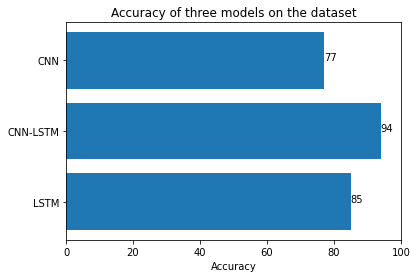

In [ ]:
names = ["LSTM","CNN-LSTM","CNN"]
results = [round(acc1*100),round(acc2*100),round(acc3*100)]
plt.title("Accuracy of three models on the dataset")
plt.xlabel("Accuracy")
plt.xlim(0,100)
plt.barh(names,results)
for index, value in enumerate(results):

    plt.text(value, index, str(value))






In [ ]:
mal = "https://apzsum.000webhostapp.com/login.htm"
benign = "https://www.phishing.org/phishing-examples"

url = mal
url_int_tokens = [[printable.index(x) + 1 for x in url if x in printable]]
max_len=200
X = sequence.pad_sequences(url_int_tokens, maxlen=max_len)


result = model2.predict(X, batch_size=1)
def print_result(proba):
    if proba > 0.5:
        return "malicious"
    else:
        return "benign"
print("Test URL:", url, "is", print_result(result[0]))



Test URL: https://apzsum.000webhostapp.com/login.htm is malicious
